# D05_Team5_Machine_Learning

In [1]:
## Import required libraries.
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [11]:
## Read data file.
df = pd.read_excel('mpg.preprocessed.xlsx')
## Drop empty columns 
df = df.drop(columns=[col for col in df if col.startswith('Unnamed:')])

## Training & Testing sets

In [12]:
X, y = df.drop(columns=["Mpg"]),  df["Mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [13]:
# Scaling features using standardization
scaler = StandardScaler()
X_train.iloc[:, 1:6]= scaler.fit_transform(X_train.iloc[:, 1:6])
X_test.iloc[:, 1:6]= scaler.transform(X_test.iloc[:, 1:6])

Note: 'Cylinders' and one hot encoded features were excluded from scaling. Not scaling 'Cylinders' column resulted in better performance of our model. Moreover, it is illogical to include one hot encoded features in scaling because the values are already scaled.


## Predictive model

In [14]:
# Stacking - Ensemble Method 

estimators = [ ('gb', GradientBoostingRegressor(n_estimators=300, random_state=0,learning_rate=0.02, max_depth=2)),
              ('rf', RandomForestRegressor(n_estimators=260, random_state=42, max_depth=20, max_features=2)),
              ('lr', LinearRegression()),
              ('svr', SVR())
             ]

stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

stack.fit(X_train, y_train)
pred_test = stack.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
print(f'R2 score: {r2_score(y_test, pred_test)}')

Mean Squared Error: 0.00035025658717183027
Root Mean Squared Error: 0.01871514325811668
Mean Absolute Error: 0.013649035624363528
R2 score: 0.9506961838337318


Initial evaluation of our model: An MSE of ~0.00591 and an R-squared score of ~0.95095, which are close to 0 and 1 respectively, is an indicator of a very efficient predictive model.

## Cross Validation

In [15]:
# Cross Validation - Stacking
estimators = [ ('gb', GradientBoostingRegressor(n_estimators=300, random_state=0,learning_rate=0.02, max_depth=2)),
              ('rf', RandomForestRegressor(n_estimators=260, random_state=42, max_depth=20, max_features=11)),
              ('lr', LinearRegression()),
              ('svr', SVR())
             ]

stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

scores = cross_val_score(stack, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Stacking\n')
print(f'MSE for each fold: {scores*(-1)}\n')
print(f'Mean MSE: {scores.mean()*(-1):.5f}\n')
print("Standard Deviation: {:.5f} ".format(scores.std()))

Stacking

MSE for each fold: [0.00071266 0.00047684 0.0007364  0.00066324 0.0009351  0.00077121
 0.00088177 0.00055448 0.00076413 0.00040071]

Mean MSE: 0.00069

Standard Deviation: 0.00016 


Final evaluation of our model: Due to the fact that our sample is relatively small we performed 10-fold cross validation so that our initial model evaluation is not based on the specific split of the dataset. We calculated the mean MSE of the 10 MSE values of each fold, as well as the Standard Deviation in order to avoid some extreme case scenario of very poor performance.

## Visualization of actual versus predicted values

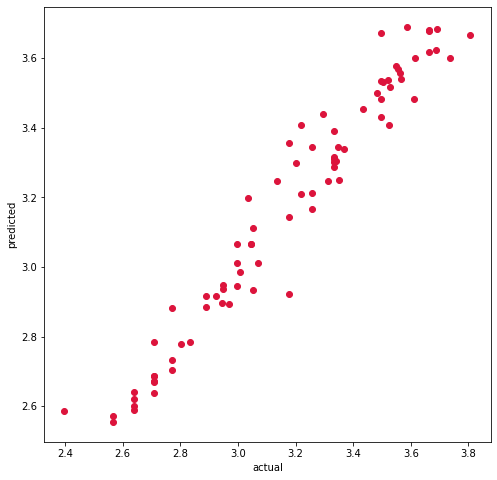

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(np.expm1(y_test), np.expm1(pred_test), c='crimson')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()